In [1]:
using Plots
include("polyfit_function.jl")
include("Lagrange_interpolation.jl")

Lagrange (generic function with 1 method)

The idea of coarsening can be understood  as follows. 

Suppose $\Delta T= m \delta t$, where m is the coarsening factor. We are talking about discretization of fine and coarse mesh. In a fine mesh one usually defines $\delta t = \frac{(T_f- T_0)}{N_t}$, where $N_t$ is the number of sub-interval. In a coarse mesh one usually defines $T_j=j\,\Delta T$, where $j=0, 1, \ldots, \frac{N_t}{m}$.


Now when we think of solving an ivp on a coarse or fine mesh, we actually require the number of time steps to feed into the solver. For example, lets assume we are solving an IVP on a time domain $[0, 1]$, and we are using the fine time steps $N_t=6$, then $\delta t= \frac{1}{6}$, and assume coarsening factor $m=2$, then $\Delta T= m \delta t= 2 \frac{1}{6}=\frac{1}{3}$, therefore, $T_j= j\Delta T$, where $j=0, 1, \frac{N_t}{m}=3$.


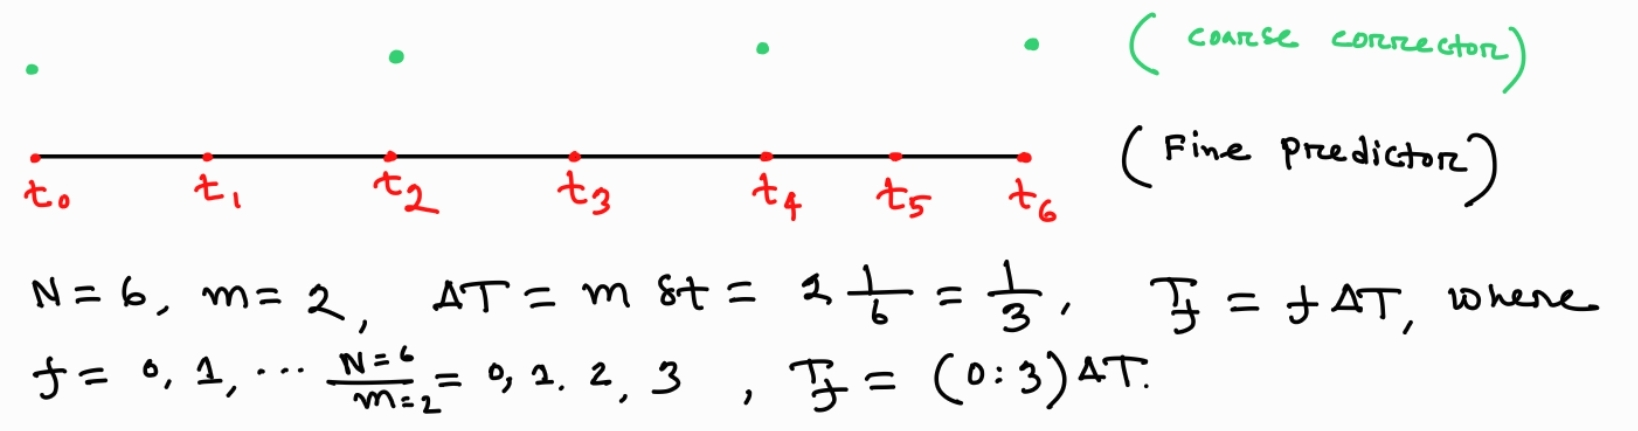

In [8]:
 function DC(f, tspan, u0, N)
    
    m= 2 # coarsenning factor
    
    M= N÷m # number of time steps in coarse level
    
    dt=(tspan[2]-tspan[1])/N
    
    DT= m*dt
    
    tval=(0:N)*dt
    
    Tval= (0:M)*DT
    
    
    up=zeros(N+1)
    up[1]=u0
    uc=zeros(M+1)
    
    uc[1]= u0
    
    #prediction
    for n=1:N
        up[n+1]= up[n] .+ dt * f(tval[n], up[n])
    end
    
    # Correction
   
    for i=1:M
        uc[i+1]= uc[i] .+ DT* (f(Tval[i], uc[i]) - f(tval[m*i-1], up[m*i-1])) + 0.5*DT*(f(tval[m*i-1], up[m*i-1])+f(tval[m*i+1], up[m*i+1]))
    end
    
    return up, uc
    
end

DC (generic function with 1 method)

convergence order = 1.9821642476833086


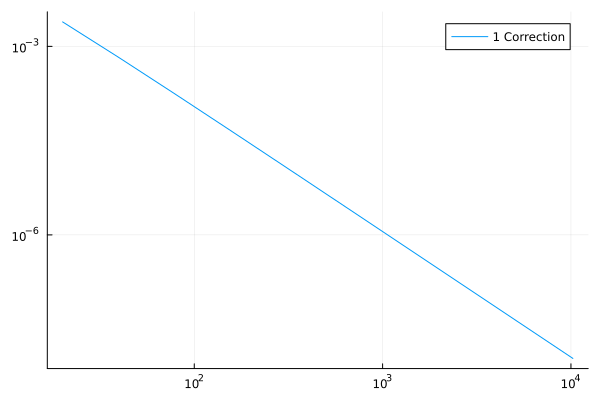

In [12]:
# Convergence test
using LinearAlgebra

u0 = 1.0
tspan=[0 1.0]
K = 10
err = zeros(K, 1)
ns=zeros(K, 1)

f(t, y) =  y

exact= u0*exp(tspan[2])
#exact=2.0

for k in 1:K
    
    N = 10*2^k
    
    ns[k]=N
    
    up, uc = DC(f, tspan, u0, N)
   
    err[k] = abs(exact .- uc[end])
end

# Compute order of convergence and error plot
pdeg = polyfit(log10.(ns[:]), log10.(err[:]),1)
print("convergence order = ",abs(pdeg[2]),"\n") 
plot(ns, err[:],xaxis=:log, yaxis=:log, label="1 Correction")
display(plot!(legend=:topright))